#### Setup

In [9]:
# tokenization
import json
import MeCab
import import_ipynb
import thesis_preprocess
from stopwords_ja import stop_words
from stopwords_slothlib import stop_words_2

# word2vec
import gensim, logging

# plotting
from sklearn.manifold import TSNE               
import numpy as np                
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

importing Jupyter notebook from thesis_preprocess.ipynb


#### Clean and Tokenize Tweets

In [6]:
# tokenize cleaned tweets into words
def tokenize(text):
    mt = MeCab.Tagger("-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd")
    parsed = mt.parseToNode(text)
    components = []
    
    while parsed:
        word = parsed.surface
        pos = parsed.feature.split(",")[0]

        # remove beg/end tokens, particles, fillers, auxiliary bound prefixes/endings
        exclude_pos = ['BOS/EOS', '助詞', 'フィラー', '接頭詞', '助動詞']
        if pos not in exclude_pos: components.append(word)
        parsed = parsed.next
    
    # remove stopwords
    components = [token for token in components if ((not token in stop_words) and (not token in stop_words_2))]
    
    return components

In [2]:
# run preprocessing and tokenization for all tweets from given year dataset
def preprocess_tokenize_all(year):
    # store results and exception tweets
    tokens = []
    retweets = []
    not_parsed = []

    # iterate through tweets, preprocess and tokenize
    with open(year + '-all.txt', 'r') as file:
        for line in file:
            tweet = json.loads(line)
            if line == None or tweet == None:
                not_parsed.append((line, tweet))
                print("Parsing error: ", line, tweet)
            elif tweet['retweetedTweet']:
                retweets.append(tweet)
                print("Retweet: ", tweet['id'])
            # filter out 2024 sponsored(?) tweets
            elif int(tweet['date'].split("-")[0]) < int(year) + 1: 
                tweet_text = tweet['rawContent'] # note: need other prop for over 140 char?
                processed = preprocess(tweet_text)            
                components = tokenize(processed)
                tokens.append(components)

    file.close()
    return tokens, retweets, not_parsed

In [9]:
# # run for 2015
# tokens_2015, retweets_2015, not_parsed_2015 = preprocess_tokenize_all("2015")

# # did we get retweets or errors?
# print(len(retweets_2015))
# print(len(not_parsed_2015))

In [8]:
# run for 2022
tokens_2022, retweets_2022, not_parsed_2022 = preprocess_tokenize_all("2022")

# did we get retweets or errors?
print(len(retweets_2022))
print(len(not_parsed_2022))

0
0


#### Word2Vec

In [7]:
# train and save word2vec model for given year
def run_word2vec(year, tokens):
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    model = gensim.models.Word2Vec(tokens, min_count=10)
    model.save("save_w2v_model_" + year)

In [8]:
# train and save word2vec model for 2015 
run_word2vec("2015", tokens_2015)

2023-12-27 14:18:40,328 : INFO : collecting all words and their counts
2023-12-27 14:18:40,334 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-12-27 14:18:40,375 : INFO : PROGRESS: at sentence #10000, processed 80576 words, keeping 20628 word types
2023-12-27 14:18:40,398 : INFO : PROGRESS: at sentence #20000, processed 163751 words, keeping 28771 word types
2023-12-27 14:18:40,419 : INFO : PROGRESS: at sentence #30000, processed 240143 words, keeping 37917 word types
2023-12-27 14:18:40,459 : INFO : PROGRESS: at sentence #40000, processed 320405 words, keeping 45289 word types
2023-12-27 14:18:40,480 : INFO : PROGRESS: at sentence #50000, processed 399765 words, keeping 51821 word types
2023-12-27 14:18:40,509 : INFO : PROGRESS: at sentence #60000, processed 476156 words, keeping 53898 word types
2023-12-27 14:18:40,534 : INFO : PROGRESS: at sentence #70000, processed 553893 words, keeping 54912 word types
2023-12-27 14:18:40,564 : INFO : PROGRESS: at s

In [9]:
# train and save word2vec model for 2022
run_word2vec("2022", tokens_2022)

2023-12-27 14:18:56,026 : INFO : collecting all words and their counts
2023-12-27 14:18:56,028 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-12-27 14:18:56,047 : INFO : PROGRESS: at sentence #10000, processed 80462 words, keeping 16625 word types
2023-12-27 14:18:56,096 : INFO : PROGRESS: at sentence #20000, processed 159565 words, keeping 20951 word types
2023-12-27 14:18:56,117 : INFO : PROGRESS: at sentence #30000, processed 241422 words, keeping 32244 word types
2023-12-27 14:18:56,152 : INFO : PROGRESS: at sentence #40000, processed 319983 words, keeping 40793 word types
2023-12-27 14:18:56,186 : INFO : PROGRESS: at sentence #50000, processed 397617 words, keeping 44689 word types
2023-12-27 14:18:56,216 : INFO : PROGRESS: at sentence #60000, processed 479082 words, keeping 46657 word types
2023-12-27 14:18:56,249 : INFO : PROGRESS: at sentence #70000, processed 559626 words, keeping 51208 word types
2023-12-27 14:18:56,268 : INFO : PROGRESS: at s

In [10]:
# load trained word2vec model
model_2015 = gensim.models.Word2Vec.load("save_w2v_model_2015")

# check similarity given by trained model
print(model_2015.wv.most_similar(positive='在日',topn=10))
print(model_2015.wv.most_similar(positive='外国人',topn=10))

2023-12-27 14:19:18,615 : INFO : loading Word2Vec object from thesis_w2v_2015_tweets
2023-12-27 14:19:18,669 : INFO : loading wv recursively from thesis_w2v_2015_tweets.wv.* with mmap=None
2023-12-27 14:19:18,671 : INFO : setting ignored attribute cum_table to None
2023-12-27 14:19:18,891 : INFO : Word2Vec lifecycle event {'fname': 'thesis_w2v_2015_tweets', 'datetime': '2023-12-27T14:19:18.891225', 'gensim': '4.3.2', 'python': '3.11.5 (main, Aug 24 2023, 15:18:16) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-13.5-x86_64-i386-64bit', 'event': 'loaded'}


[('密輸', 0.9225761890411377), ('社説', 0.921892523765564), ('皇太子', 0.9214861392974854), ('日刊ゲンダイ', 0.9205718636512756), ('半島', 0.9186257719993591), ('領土', 0.9182296395301819), ('偽装', 0.9176166653633118), ('緊縮', 0.9176071882247925), ('戦争犯罪', 0.917079508304596), ('霞', 0.9158768057823181)]
[('他国', 0.9100844860076904), ('外国', 0.9091653823852539), ('中国人', 0.9011421799659729), ('日本人', 0.8940977454185486), ('移民', 0.8915354609489441), ('難民', 0.8761928081512451), ('左翼', 0.8747358322143555), ('国会議員', 0.8564897775650024), ('若者', 0.8546940684318542), ('雇用', 0.8544275164604187)]


In [11]:
# same for 2022
model_2022 = gensim.models.Word2Vec.load("save_w2v_model_2022")

print(model_2022.wv.most_similar(positive='在日',topn=10))
print(model_2022.wv.most_similar(positive='外国人',topn=10))

2023-12-27 14:19:20,091 : INFO : loading Word2Vec object from thesis_w2v_2022_tweets
2023-12-27 14:19:20,133 : INFO : loading wv recursively from thesis_w2v_2022_tweets.wv.* with mmap=None
2023-12-27 14:19:20,133 : INFO : setting ignored attribute cum_table to None
2023-12-27 14:19:20,339 : INFO : Word2Vec lifecycle event {'fname': 'thesis_w2v_2022_tweets', 'datetime': '2023-12-27T14:19:20.339315', 'gensim': '4.3.2', 'python': '3.11.5 (main, Aug 24 2023, 15:18:16) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-13.5-x86_64-i386-64bit', 'event': 'loaded'}


[('共産主義', 0.9306224584579468), ('併合', 0.9204510450363159), ('略奪', 0.9177254438400269), ('ナチス', 0.914193332195282), ('イラク', 0.9130715131759644), ('軍事力', 0.9127207398414612), ('従わ', 0.9111466407775879), ('人身売買', 0.9108579158782959), ('諸国', 0.9105721712112427), ('辺野古', 0.9075276255607605)]
[('中国人', 0.8970280885696411), ('自国', 0.894239604473114), ('欧米', 0.8910224437713623), ('中国', 0.8830902576446533), ('日本人', 0.8747531175613403), ('れいわ', 0.8741739988327026), ('イスラム教', 0.8676839470863342), ('独立', 0.8672612905502319), ('教会', 0.8656696677207947), ('カルト', 0.8599515557289124)]


#### Plot Word2Vec Findings

In [12]:
# https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py

def reduce_dimensions(model):
    num_dimensions = 2

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals

In [13]:
# plot similar words
# https://aneesha.medium.com/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229 
# https://albertauyeung.github.io/2020/03/15/matplotlib-cjk-fonts.html/
# https://stackoverflow.com/questions/70268270/how-to-plot-tsne-on-word2vec-created-from-gensim-for-the-most-similar-20-cases

def plot_closest_words(word, model, x_vals, y_vals):
    labels = [i for i in model.wv.index_to_key]
    close_words = [i[0] for i in model.wv.most_similar(positive=word, topn=15)]

    fprop = fm.FontProperties(fname='NotoSansJP-VariableFont_wght.ttf')
    for word in close_words:
        i = labels.index(word)
        plt.scatter(x_vals[i],y_vals[i])
        plt.annotate(labels[i], xy=(x_vals[i], y_vals[i]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom', fontproperties=fprop)

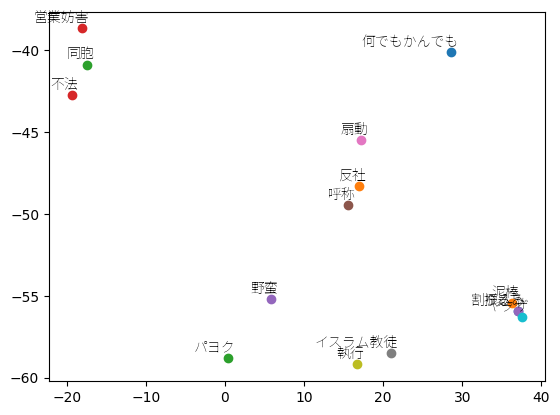

In [14]:
x_vals, y_vals = reduce_dimensions(model_2015)
plot_closest_words("外人", model_2015, x_vals, y_vals)

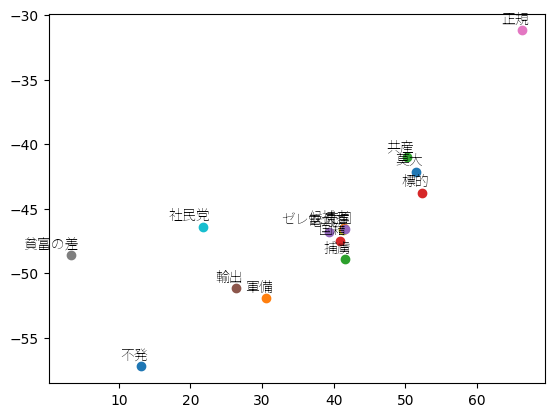

In [21]:
x_vals, y_vals = reduce_dimensions(model_2022)
plot_closest_words("外人", model_2022, x_vals, y_vals)

In [15]:
model_2015.wv.most_similar(positive="外人", topn=15)

[('割り込み', 0.8860533237457275),
 ('反社', 0.8832544684410095),
 ('同胞', 0.8824900388717651),
 ('不法', 0.8819209337234497),
 ('振るう', 0.8811072707176208),
 ('呼称', 0.8809957504272461),
 ('扇動', 0.876920759677887),
 ('イスラム教徒', 0.8765144944190979),
 ('執行', 0.8759120106697083),
 ('ヤクザ', 0.8744602799415588),
 ('何でもかんでも', 0.8738333582878113),
 ('泥棒', 0.8737172484397888),
 ('パヨク', 0.8736859560012817),
 ('営業妨害', 0.8731456995010376),
 ('野蛮', 0.8725719451904297)]

In [16]:
model_2022.wv.most_similar(positive="外人", topn=15)

[('不発', 0.8506039977073669),
 ('軍備', 0.8255631923675537),
 ('共産', 0.8236428499221802),
 ('国籍', 0.821510910987854),
 ('電力', 0.8174948692321777),
 ('輸出', 0.8158841133117676),
 ('正規', 0.8158621191978455),
 ('貧富の差', 0.8142353892326355),
 ('ゼレンスキ', 0.8098755478858948),
 ('社民党', 0.8073658347129822),
 ('莫大', 0.807080090045929),
 ('候補者', 0.8061603903770447),
 ('捕虜', 0.8054761290550232),
 ('標的', 0.8051358461380005),
 ('売国', 0.8046982288360596)]

In [17]:
words = model_2015.wv.most_similar(positive="在日", topn=15)
for word in words:
    print(word[0])

密輸
社説
皇太子
日刊ゲンダイ
半島
領土
偽装
緊縮
戦争犯罪
霞
結託
似非
邪教
カタル
東京地検特捜部


In [18]:
words = model_2022.wv.most_similar(positive="在日", topn=15)
for word in words:
    print(word[0])

共産主義
併合
略奪
ナチス
イラク
軍事力
従わ
人身売買
諸国
辺野古
クルド人
イスラム
ひろゆき
核
菅


In [22]:
common = model_2015.wv.index_to_key[:50]
for word in common:
    print(word)

てる
おはよう
ありがとう
今日
いい
おは
ください
くれ
フォロ
参加
思っ
すぎ
好き
やっ
み
笑
応募
お願い
来
良い
キャンペン
くん
結果
思う
もう
楽しみ
寝
言っ
仕事
思い
すぎる
良かっ
よろしく
出
行っ
朝
食べ
明日
配信
欲しい
昨日
よろしくお願いします
おめでとう
待っ
ぜひ
嬉しい
どう
っ
動画
本当に


In [23]:
common = model_2022.wv.index_to_key[:50]
for word in common:
    print(word)

てる
おはよう
ありがとう
今日
いい
ください
おは
くれ
思っ
参加
すぎ
好き
結果
笑
やっ
み
良い
寝
フォロ
お願い
明日
くん
来
もう
思う
朝
昨日
言っ
キャンペン
すぎる
行っ
出
楽しみ
動画
思い
応募
食べ
っ
仕事
どう
嬉しい
当たる
ござい
おめでとう
起き
可愛い
まだ
本当に
よろしくお願いします
残念
